# Run-of-river data

There is no data on when run-of-river plants operate in Quebec. Here we estimate the distribution of production throught the year looking at the runof data on hydrometric stations close to big run-of-river power plants. The data is from a periods where the nearby plants were already in operation.

In [1]:
% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# plot parameters

smallwidth=3.54
mediumwidth=5.51
bigwidth=7.48

SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SIZE)                # controls default text sizes
plt.rc('axes', titlesize=SIZE)           # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)          # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)          # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)          # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('seaborn-deep')

## 1) load names of stations measuring flow

The data was queried from the Hydat database, using the software *Environment Canada data explorer*, made available by the [Canadian Government](http://www.ec.gc.ca/rhc-wsc/default.asp?lang=en&n=0A47D72F-1)

the Hydat database has a document with all the stations and associated metadata

In [4]:
stations=pd.read_csv('riverflowdata/Nov-18-2016_04_42_43AM.csv',
                     encoding='latin',
                     index_col='Station Number',
                     skip_footer=21,engine='python')

In [5]:
stations.head(1)

,Water Course,Latitude,Longitude,Gross Drainage Area (km2),Effective Drainage Area (km2),Land Description,Year From,Year To,Data Type,Gauge Type,Operation Schedule,Published,Station Class,River Type,Regulated Since,Contributed By,Costing Agency
Station Number,,,,,,,,,,,,,,,,,
07NB001,..SLAVE RIVER AT FITZGERALD (ALBERTA),"59°52'20""","111°35'00""",606000,NaN,NaN,1921.0,1922.0,Q,M,S,NaN,NaN,REG,1968.0,NaN,NaN


## Identify the stations in or close to the rivers that have largest Run-of-River facilities

Hydropower capacity by power plant retrieved from the [Hydro Quebec website](http://www.hydroquebec.com/generation/centrale-hydroelectrique.html)

In [7]:
hp_plants=pd.read_csv('HQ data/hydropower-capacity.csv',sep=';',index_col='Name',decimal=',')

after copy-pasting the text from the website and storing it as a csv, we can load it, but it needs some data cleaning

In [8]:
hp_plants.index=hp_plants.index.str.rstrip()
hp_plants['Type']=hp_plants['Type'].str.rstrip()

In [9]:
hp_plants['Type'].unique() 

array(['Reservoir', 'Run-of- river'], dtype=object)

The first three examples 

In [10]:
hp_plants.head(3)

,Watersheds,River or other watercourse,Type,Installed capacity (MW),Number of units,Head (m),Commissioning date
Name,,,,,,,
Robert-Bourassa,La Grande,Grande Rivière,Reservoir,5616.0,16.0,"137,16",1979– 1981
La Grande-4,La Grande,Grande Rivière,Reservoir,2779.0,9.0,"116,7",1984– 1986
La Grande-3,La Grande,Grande Rivière,Reservoir,2417.0,12.0,79,1982– 1984


Identify the 25 most powerful hydropower plants

In [11]:
(hp_plants[hp_plants['Type']=='Run-of- river'])['Installed\xa0capacity (MW)'].iloc[:25]

Name
Beauharnois                   1853.0
La Grande-1                   1436.0
René-Lévesque    (Manic-3)    1326.0
Jean-Lesage    (Manic-2)      1229.0
Outardes-3                    1026.0
Bersimis-2                     869.0
Outardes-4                     785.0
Carillon                       753.0
Outardes-2                     523.0
Péribonka                      385.0
Laforge-2                      319.0
Trenche                        302.0
La Tuque                       294.0
Beaumont                       270.0
Romaine-1                      270.0
McCormick4                     235.0
Rocher-de- Grand-Mère          230.0
Paugan                         226.0
Shawinigan-2                   200.0
Shawinigan-3                   194.0
Manic-1                        184.0
Rapides-des-Îles               176.0
Chelsea                        152.0
Sarcelle                       150.0
La Gabelle                     131.0
Name: Installed capacity (MW), dtype: float64

Unfortunately there is not runoff data representative of *La Grande* hydropower complex after the complex was built

# load runoff data from hydrometric stations

## River 1 : St. Laurent river | Beauharnois station

In [12]:
r1=pd.read_csv('riverflowdata/02MC010_Daily_Flow_ts.csv',index_col="Date",parse_dates=True)

In [13]:
#data cleaning
r1.columns=r1.columns.str.lstrip() # clean blank spaces in the columns
r1.drop('NaT',inplace=True) # clean disclaimer text at the end

metadata of the station measuring the flow

In [14]:
stations.loc[r1['ID'].iloc[0]]

Water Course                     SAINT-LAURENT (FLEUVE) - CENTRALE DE BEAUHARNOIS
Latitude                                                                45°18'00"
Longitude                                                               73°54'30"
Gross Drainage Area (km2)                                                  772000
Effective Drainage Area (km2)                                                 NaN
Land Description                                                              NaN
Year From                                                                    1932
Year To                                                                      1994
Data Type                                                                       Q
Gauge Type                                                                      P
Operation Schedule                                                              C
Published                                                                     NaN
Station Class   

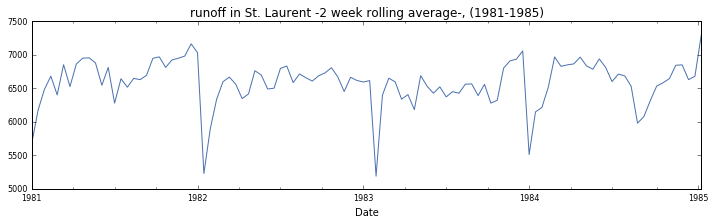

In [15]:
r1['Flow']['1981':'1984'].resample('2W').mean().plot(figsize=(12,3))
plt.gca().set_title('runoff in St. Laurent -2 week rolling average-, (1981-1985)',fontsize=12)

It can be seen that flow goes sharply down before the peak, probably due to storage upstream. There is not a marked rise of flow during the spring

## river 2 : Betsiamites river | Bersimis-2 station

In [16]:
hp_plants.loc['Bersimis-2']

Watersheds                      Betsiamites
River or other watercourse     Betsiamites 
Type                          Run-of- river
Installed capacity (MW)                 869
Number of units                           5
Head (m)                             115,83
Commissioning  date              1959– 1960
Name: Bersimis-2, dtype: object

In [17]:
r2=pd.read_csv('riverflowdata/02SB004_Daily_Flow_ts.csv',index_col="Date",parse_dates=True)
r2.columns=r2.columns.str.lstrip()
r2.drop('NaT',inplace=True) # clean disclaimer text at the end

## River 3: Outardes | 'Outardes-2' station

In [18]:
r3=pd.read_csv('riverflowdata/02TE003_Daily_Flow_ts.csv',index_col="Date",parse_dates=True)
r3.columns=r3.columns.str.lstrip()
r3.drop('NaT',inplace=True)

## River 4: Manicouagan (Mc Kormic 4 station)

In [19]:
r4=pd.read_csv('riverflowdata/02TC003_Daily_Flow_ts.csv',index_col="Date",parse_dates=True)
r4.columns=r4.columns.str.lstrip()
r4.drop('NaT',inplace=True)

## River 5: Outaouais (Carillon station)

In [20]:
r5=pd.read_csv('riverflowdata/02LB024_Daily_Flow_ts.csv',index_col="Date",parse_dates=True)
r5.columns=r5.columns.str.lstrip()
r5.drop('NaT',inplace=True)

# Weight the flows by the nameplate capacity of the power plant

We decided to weight the flow by the nameplate capacity of the plant, rather than the flow. As not all the flow of the river will necesarely pass by the power plant. This would give a more accurate proxy of the amount of electricity produced by plant.

In [21]:
hp_plants.loc[['Beauharnois','Bersimis-2','Outardes-2','McCormick4','Carillon'],'Installed\xa0capacity (MW)']

Name
Beauharnois    1853.0
Bersimis-2      869.0
Outardes-2      523.0
McCormick4      235.0
Carillon        753.0
Name: Installed capacity (MW), dtype: float64

In [22]:
r1['weighted_norm_flow']=r1['Flow']/r1['Flow'].mean()*hp_plants.loc['Beauharnois','Installed\xa0capacity (MW)']
r2['weighted_norm_flow']=r2['Flow']/r2['Flow'].mean()*hp_plants.loc['Bersimis-2','Installed\xa0capacity (MW)']
r3['weighted_norm_flow']=r3['Flow']/r3['Flow'].mean()*hp_plants.loc['Outardes-2','Installed\xa0capacity (MW)'] 
r4['weighted_norm_flow']=r4['Flow']/r4['Flow'].mean()*hp_plants.loc['McCormick4','Installed\xa0capacity (MW)']
r5['weighted_norm_flow']=r5['Flow']/r5['Flow'].mean()*hp_plants.loc['Carillon','Installed\xa0capacity (MW)']

some rivers have a more variable production than others

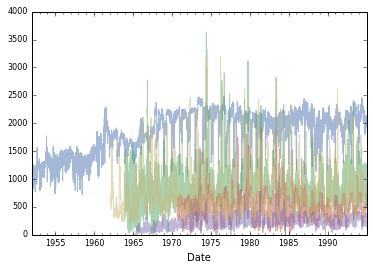

In [23]:
r1['weighted_norm_flow'].plot(alpha=0.5)
r2['weighted_norm_flow'].plot(alpha=0.5)
r3['weighted_norm_flow'].plot(alpha=0.5)
r4['weighted_norm_flow'].plot(alpha=0.5)
r5['weighted_norm_flow'].plot(alpha=0.5)

# calculate an aggregated proxy 

we select a period of time where all the plants were already in operation

In [24]:
hp_plants.loc[['Beauharnois','Bersimis-2','Outardes-2','McCormick4','Carillon'],'Commissioning\xa0\xa0date']

Name
Beauharnois    1932– 1961
Bersimis-2     1959– 1960
Outardes-2          1978 
McCormick4          1952 
Carillon       1962– 1964
Name: Commissioning  date, dtype: object

To characterise the run-of-river production, we sum our proxy of electricity production per station for all rivers. We do it for a period that has records for all rivers (1971-1995)

In [25]:
RORpower=pd.DataFrame()
RORpower['riversum']=r1.loc['19780101':'19941231','weighted_norm_flow']+\
r2.loc['19780101':'19941231','weighted_norm_flow']+\
r3.loc['19780101':'19941231','weighted_norm_flow']+\
r4.loc['19780101':'19941231','weighted_norm_flow']+\
r5.loc['19780101':'19941231','weighted_norm_flow']

In [26]:
RORpower.head()

,riversum
Date,
1978-01-01,4394.477078
1978-01-02,4451.697794
1978-01-03,4801.899231
1978-01-04,4641.534857
1978-01-05,4494.151749


Estimate a representative year calculating the average flow per day of year for all the years in the studied period

In [27]:
RORpower['datecolumn']=RORpower.index

In [28]:
RORpower['day']=pd.to_datetime(RORpower['datecolumn']).dt.dayofyear

In [29]:
RORpower_avyear=RORpower[['riversum','day']].groupby('day').mean()

### compare the representative year with other years

we compare the average flow of our *representative year* with the average flow per year during the studied period. The average is within normal average flows. in that sense it is a "feasible" year

In [30]:
RORpower['year']=pd.to_datetime(RORpower['datecolumn']).dt.year

In [31]:
compare=pd.DataFrame()
compare=RORpower[['riversum','year']].groupby('year').mean()

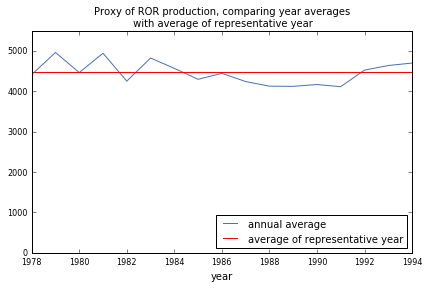

In [32]:
fig1=compare['riversum'].plot()
a=plt.gca()
a.set_title('Proxy of ROR production, comparing year averages\n with average of representative year',fontsize=10)
line=a.axhline(4487.79,color='r')
line.set_label('average of representative year')

plt.ylim(0,5500)
L=plt.legend(loc='lower right',fontsize=10)
L.get_texts()[0].set_text('annual average')
plt.tight_layout()
plt.savefig('comparing representative year with the rest.png',dpi=700)

# Boxplot of variability per season

Normalize the flow by the average (in order to have a normalized proxy)

In [33]:
RORpower_avyear['normproxy']=(RORpower_avyear['riversum']/RORpower_avyear['riversum'].mean())

define seasons based on the day of the year

In [34]:
RORpower_avyear.loc[(RORpower_avyear.index > 82) & (RORpower_avyear.index < 171),'season']='spring'
RORpower_avyear.loc[(RORpower_avyear.index > 172) & (RORpower_avyear.index < 263),'season']='summer'
RORpower_avyear.loc[(RORpower_avyear.index > 264) & (RORpower_avyear.index < 354),'season']='fall'
RORpower_avyear.loc[RORpower_avyear['season'].isnull(),'season']='winter'

veryfing that the mean is equal to 1

In [35]:
RORpower_avyear[['normproxy','season']].groupby('season').describe().unstack()['normproxy','mean'].mean()

0.9995947699197992

Boxplot ilustrating the intra-annual variability of run-of-river production

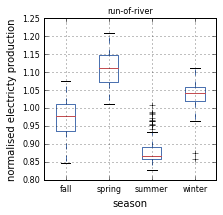

In [36]:
bp2=RORpower_avyear.boxplot(column='normproxy',by='season',figsize=(bigwidth/2.5,bigwidth/2.5))
bp2.set_title('run-of-river')
plt.suptitle('')
bp2.set_ylabel('normalised electricty production')
#plt.savefig('boxplot_RORseasonal_norm.png',dpi=800)